# Problem Statement

A US-based housing company  is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.


# Business Goal  

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 

Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Approch Followed 

### 1. Data Preperation
        
    - Housing Data Load
    - Data Analysis to develop data understanding and fimilarity
    - Handling Missing Values
    - Duplicate Check 
    - Data Cleansing which directly impacts the model performance and insights comes out more clearly
  
### 2. EDA

    - Univariate analysis for categorical column
    - Outlier Analysis of Input data
    - Correlation Analysis of Input Data
    - Bi-VArient Analysis of Attributes
 
### 3. Data Preperation
    - Mapping Categorical values
    - Coversion of columns like year etc. to draw meaning out of this attribute

### 4. Model Building
    - train test split of data
    - Regression using Ridge
    - Regression using Lasso
    - Performace comparison
    - Determining RMSE Error
    - Determining Best predictor variables 

### 5. Conclusion
    - Details around how the analysis,EDA etc. all comes togther in action for achieving the business objectives
    - Information about best fit model and top predictor variables 


## Step 1 - Data Preperation

In [1]:
# Importing the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import linear_model


Bad key "text.kerning_factor" on line 4 in
C:\Users\Vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


#### 1.1 Data Load

In [2]:
##Loading the Input Data(contained in CSV file)
housing_data=pd.read_csv('train.csv')

In [3]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### 1.2 Data Analysis

In [4]:
## Check the Shape/Dimension of data
housing_data.shape

(1460, 81)

In [5]:
# Analyzing numerical attributes
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Analyzing Type & number of values for each field
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### 1.3 Handling Missing Values

In [7]:
# Cheking # of number of missing values for each coloumn
pd.set_option('display.max_rows',None)
Missing_Value=housing_data.isnull().sum().reset_index()
Missing_Value.columns=['Column Name','Missing Value Count']
Missing_Value[Missing_Value['Missing Value Count']>0]

,Column Name,Missing Value Count
3,LotFrontage,259
6,Alley,1369
25,MasVnrType,8
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37
32,BsmtExposure,38
33,BsmtFinType1,37
35,BsmtFinType2,38
42,Electrical,1


In [8]:
# Calculating missing values in terms of percentage
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [9]:
#Drop the columns having missing value percentage>15
columns_to_drop = ['Alley','FireplaceQu', 'PoolQC','Fence','MiscFeature','Id','LotFrontage']
housing_data.drop(columns_to_drop, axis=1, inplace=True)
housing_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
#Check the shape/dimension of input data
housing_data.shape

(1460, 74)

In [11]:
#Again Calculating missing values in terms of percentage
round(100*(housing_data.isnull().sum()/len(housing_data.index)), 2)

MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBa

In [12]:
#Cheking number of missing values for each coloumn
pd.set_option('display.max_rows',None)
Missing_Value=housing_data.isnull().sum().reset_index()
Missing_Value.columns=['Column Name','Missing Value Count']
Missing_Value[Missing_Value['Missing Value Count']>0]

,Column Name,Missing Value Count
22,MasVnrType,8
23,MasVnrArea,8
27,BsmtQual,37
28,BsmtCond,37
29,BsmtExposure,38
30,BsmtFinType1,37
32,BsmtFinType2,38
39,Electrical,1
54,GarageType,81
55,GarageYrBlt,81


In [13]:
#Filling out null values with a defined stratergy to handle missing value
# This could be either by mode,median or mean etc.in some cases could be some value depending on attribute
housing_data.MasVnrType.fillna('None',inplace=True)
housing_data.MasVnrArea.fillna(housing_data.MasVnrArea.mean(),inplace=True)
housing_data.BsmtQual.fillna(housing_data.BsmtQual.mode()[0],inplace=True)
housing_data.BsmtCond.fillna(housing_data.BsmtCond.mode()[0],inplace=True)
housing_data.BsmtExposure.fillna(housing_data.BsmtExposure.mode()[0],inplace=True)
housing_data.BsmtFinType1.fillna(housing_data.BsmtFinType1.mode()[0],inplace=True)
housing_data.BsmtFinType2.fillna(housing_data.BsmtFinType2.mode()[0],inplace=True)
housing_data.Electrical.fillna(housing_data.Electrical.mode()[0],inplace=True)
housing_data.GarageType.fillna(housing_data.GarageType.mode()[0],inplace=True)
housing_data.GarageYrBlt.fillna(0,inplace=True)
housing_data.GarageFinish.fillna(housing_data.GarageFinish.mode()[0],inplace=True)
housing_data.GarageQual.fillna(housing_data.GarageQual.mode()[0],inplace=True)
housing_data.GarageCond.fillna(housing_data.GarageCond.mode()[0],inplace=True)

In [14]:
# Calculating missing values in terms of percentage
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

#### 1.4 Duplicate Check

In [15]:
#Check for any duplicate entries
housing_data[housing_data.duplicated(keep=False)]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [16]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [17]:
##Validate the input data
housing_data.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


#### 1.5 Data Cleansing

In [18]:
##Analyze count of distinct values in PavedDrive
housing_data.PavedDrive.value_counts(normalize=True)

Y    0.917808
N    0.061644
P    0.020548
Name: PavedDrive, dtype: float64

In [19]:
##Analyze count of distinct values in GarageCond
housing_data.GarageCond.value_counts(normalize=True)

TA    0.963699
Fa    0.023973
Gd    0.006164
Po    0.004795
Ex    0.001370
Name: GarageCond, dtype: float64

In [20]:
##Analyze count of distinct values in GarageQual
housing_data.GarageQual.value_counts(normalize=True)

TA    0.953425
Fa    0.032877
Gd    0.009589
Ex    0.002055
Po    0.002055
Name: GarageQual, dtype: float64

In [21]:
##Analyze count of distinct values in Functional
housing_data.Functional.value_counts(normalize=True)

Typ     0.931507
Min2    0.023288
Min1    0.021233
Mod     0.010274
Maj1    0.009589
Maj2    0.003425
Sev     0.000685
Name: Functional, dtype: float64

In [22]:
##Analyze count of distinct values in Electrical
housing_data.Electrical.value_counts(normalize=True)

SBrkr    0.914384
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64

In [23]:
##Analyze count of distinct values in CentralAir
housing_data.CentralAir.value_counts(normalize=True)

Y    0.934932
N    0.065068
Name: CentralAir, dtype: float64

In [24]:
##Analyze count of distinct values in Heating
housing_data.Heating.value_counts(normalize=True)

GasA     0.978082
GasW     0.012329
Grav     0.004795
Wall     0.002740
OthW     0.001370
Floor    0.000685
Name: Heating, dtype: float64

In [25]:
##Analyze count of distinct values in BsmtCond
housing_data.BsmtCond.value_counts(normalize=True)

TA    0.923288
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64

In [26]:
##Analyze count of distinct values in RoofMatl
housing_data.RoofMatl.value_counts(normalize=True)

CompShg    0.982192
Tar&Grv    0.007534
WdShngl    0.004110
WdShake    0.003425
Roll       0.000685
Membran    0.000685
ClyTile    0.000685
Metal      0.000685
Name: RoofMatl, dtype: float64

In [27]:
##Analyze count of distinct values in Street
housing_data.Street.value_counts(normalize=True)

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64

In [28]:
##Analyze count of distinct values in Utilities
housing_data.Utilities.value_counts(normalize=True)

AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64

In [29]:
##Analyze count of distinct values in LandContour
housing_data.LandContour.value_counts(normalize=True)

Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64

In [30]:
##Analyze count of distinct values in LandSlope
housing_data.LandSlope.value_counts(normalize=True)

Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64

In [31]:
##Analyze count of distinct values in Condition2
housing_data.Condition2.value_counts(normalize=True)

Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAe      0.000685
RRAn      0.000685
Name: Condition2, dtype: float64

#### Observation : The above analyzed colum have count of some unique values with more than 90% of total count.This clealy indicates biasness and there exsistence in data won't impact the outcome. Hece we would be dropping these columns

In [32]:
###drop the columns having more than 90% similar values as there exsistence won't be effecting the prictor varibal  
columns_to_drop = ['PavedDrive','GarageCond', 'GarageQual','Condition2','LandSlope','LandContour','Utilities','Street',
                   'RoofMatl','BsmtCond','Heating','CentralAir','Electrical','Neighborhood','Functional']
housing_data.drop(columns_to_drop, axis=1, inplace=True)
housing_data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Inside,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Reg,FR2,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,IR1,Inside,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,IR1,Corner,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,IR1,FR2,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [33]:
#Check the shape of data
housing_data.shape

(1460, 59)

In [34]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LotConfig      1460 non-null   object 
 5   Condition1     1460 non-null   object 
 6   BldgType       1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  RoofStyle      1460 non-null   object 
 13  Exterior1st    1460 non-null   object 
 14  Exterior2nd    1460 non-null   object 
 15  MasVnrType     1460 non-null   object 
 16  MasVnrArea     1460 non-null   float64
 17  ExterQual      1460 non-null   object 
 18  ExterCon

## Step 2 - EDA

#### 2.1 Univariate analysis for categorical column

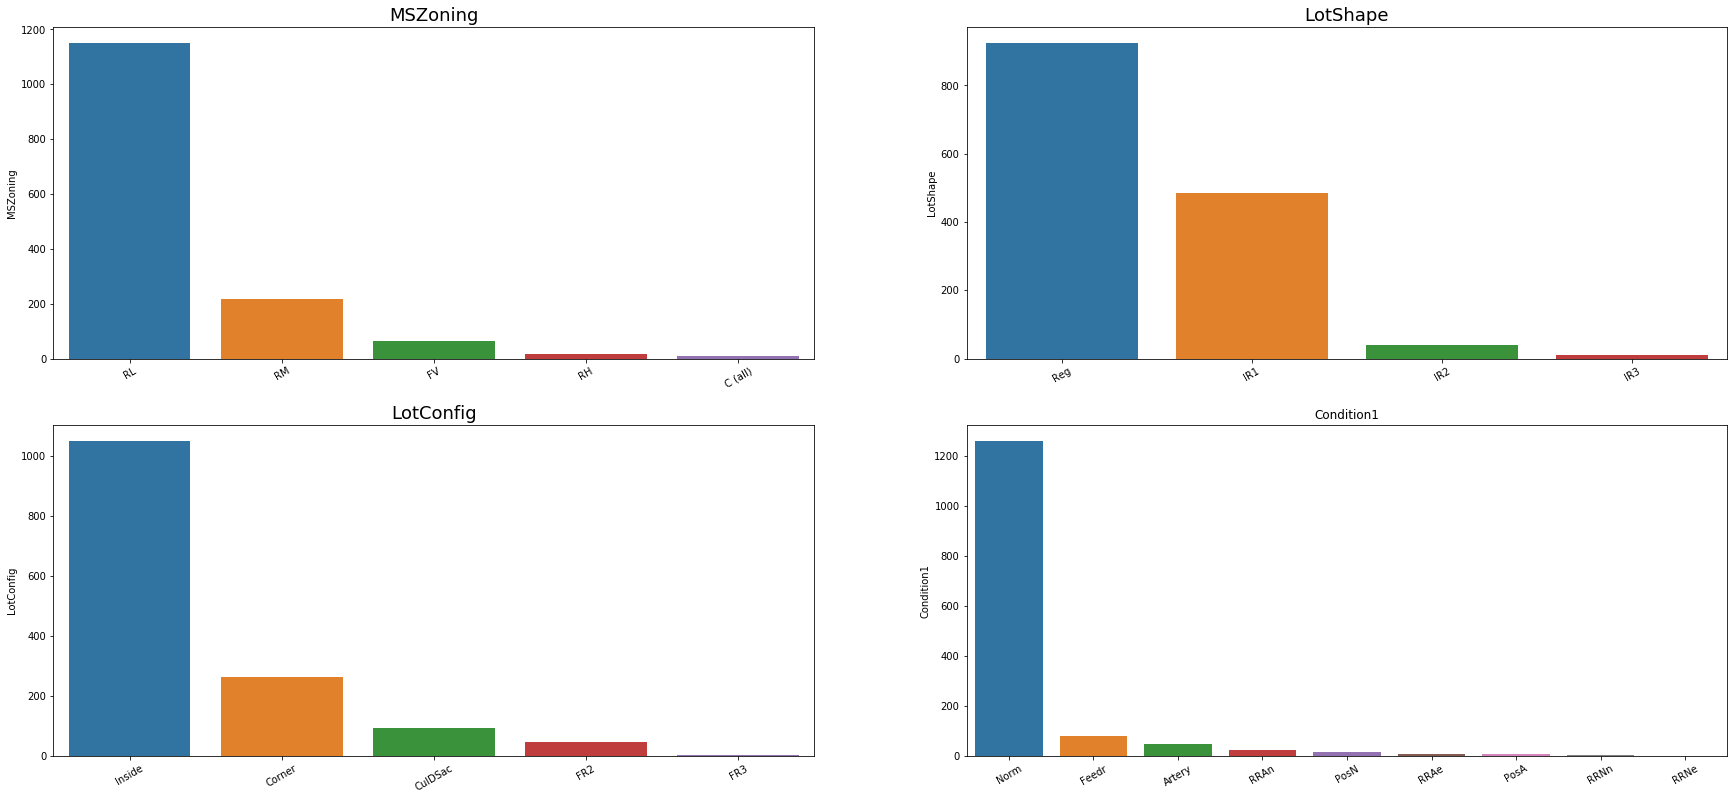

In [35]:
plt.figure(figsize=(30,50)) 
# Making a plot with 2 subplots

housing_data_Zone = housing_data['MSZoning'].value_counts()
housing_data_LotShape = housing_data['LotShape'].value_counts()
housing_data_LotConfig = housing_data['LotConfig'].value_counts()
housing_data_Condition1 = housing_data['Condition1'].value_counts()
housing_data_HouseStyle	 = housing_data['HouseStyle'].value_counts()
housing_data_ExterQual = housing_data['ExterQual'].value_counts()
housing_data_ExterCond = housing_data['ExterCond'].value_counts()
housing_data_Foundation= housing_data['Foundation'].value_counts()
housing_data_BsmtQual = housing_data['BsmtQual'].value_counts()
housing_data_KitchenQual = housing_data['KitchenQual'].value_counts()
housing_data_GarageType	 = housing_data['GarageType'].value_counts()
housing_data_GarageFinish= housing_data['GarageFinish'].value_counts()
housing_data_SaleCondition = housing_data['SaleCondition'].value_counts()

plt.subplot(7,2,1)
sns.barplot(x=housing_data_Zone.index, y=housing_data_Zone)
plt.title("MSZoning", fontsize=18)
plt.xticks(rotation=30)

plt.subplot(7,2,2)
sns.barplot(x=housing_data_LotShape.index, y=housing_data_LotShape)
plt.title("LotShape", fontsize=18)
plt.xticks(rotation=30)

plt.subplot(7,2,3)
sns.barplot(x=housing_data_LotConfig.index, y=housing_data_LotConfig)
plt.title("LotConfig", fontsize=18)
plt.xticks(rotation=30)

plt.subplot(7,2,4)
sns.barplot(x=housing_data_Condition1.index, y=housing_data_Condition1)
plt.title("Condition1", fontsize=12)
plt.xticks(rotation=30)

plt.show()

### Inference 
1. Majority of the houses belongs to Residential zones with Low density being the higghest
2. Most of the plot have Regular shape followed by some having irrelugar shapes. Shape is also a deciding factor in determining the cost of a house
3. Significant number of houses are inside or belongs in between group of houses followed by corner houses.

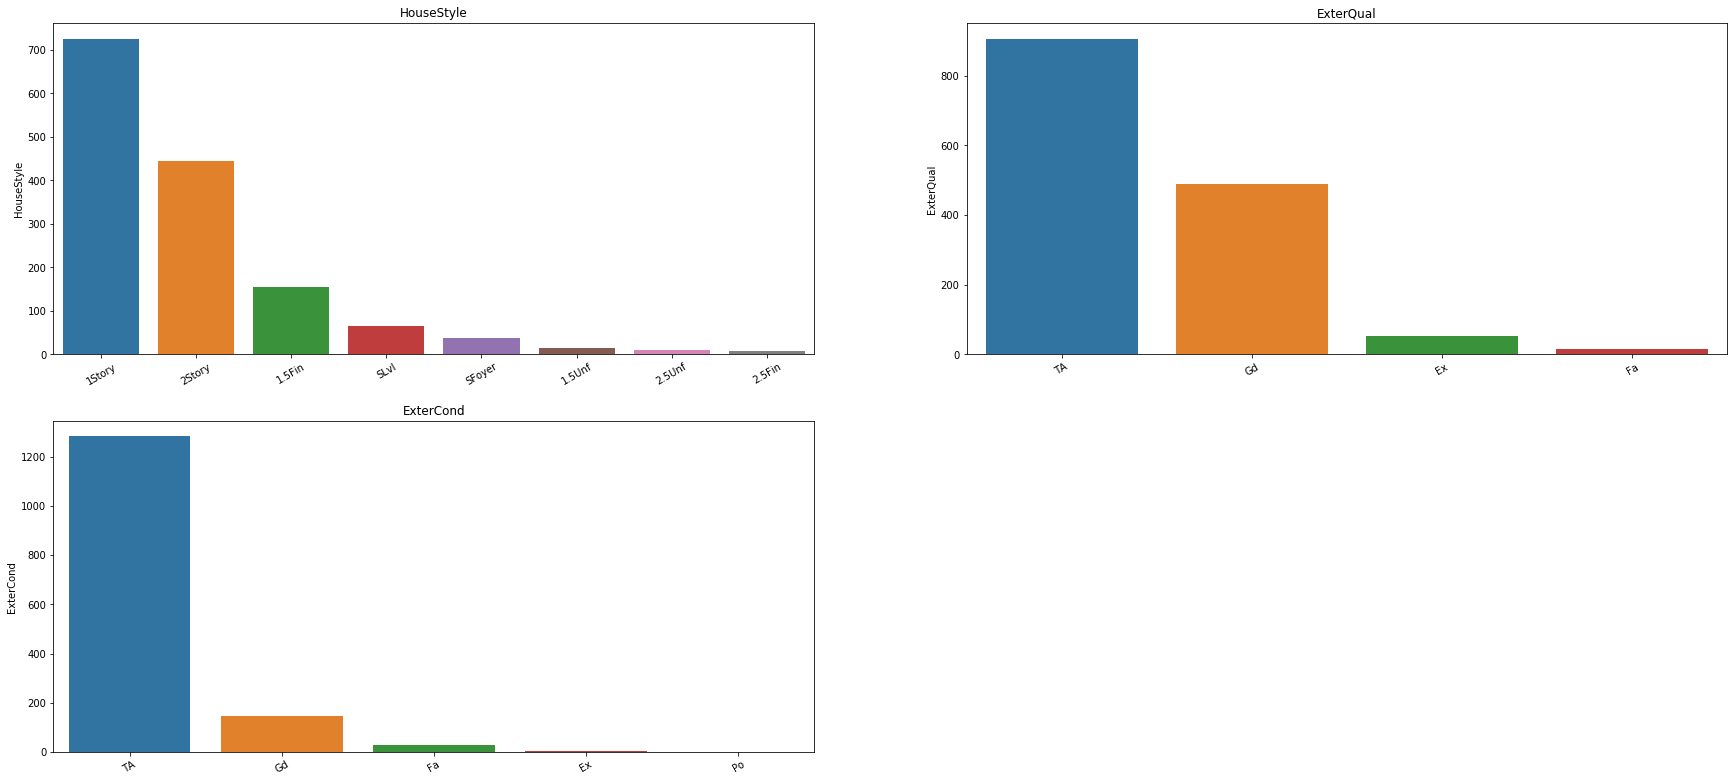

In [36]:
## Creating bar plots for categorical columns
plt.figure(figsize=(30,50)) 

plt.subplot(7,2,5)
sns.barplot(x=housing_data_HouseStyle.index, y=housing_data_HouseStyle)
plt.title("HouseStyle", fontsize=12)
plt.xticks(rotation=30)

plt.subplot(7,2,6)
sns.barplot(x=housing_data_ExterQual.index, y=housing_data_ExterQual)
plt.title("ExterQual", fontsize=12)
plt.xticks(rotation=30)

plt.subplot(7,2,7)
sns.barplot(x=housing_data_ExterCond.index, y=housing_data_ExterCond)
plt.title("ExterCond", fontsize=12)
plt.xticks(rotation=30)

plt.show()

### Inference
1. Majority of the houses are single story buildings follwed by two story buildings
2. Most of the plots have Average external quality follwed by good ones
3. Significant number of houses have Average external condition follwed by good ones. Very few plots have excellent external condition

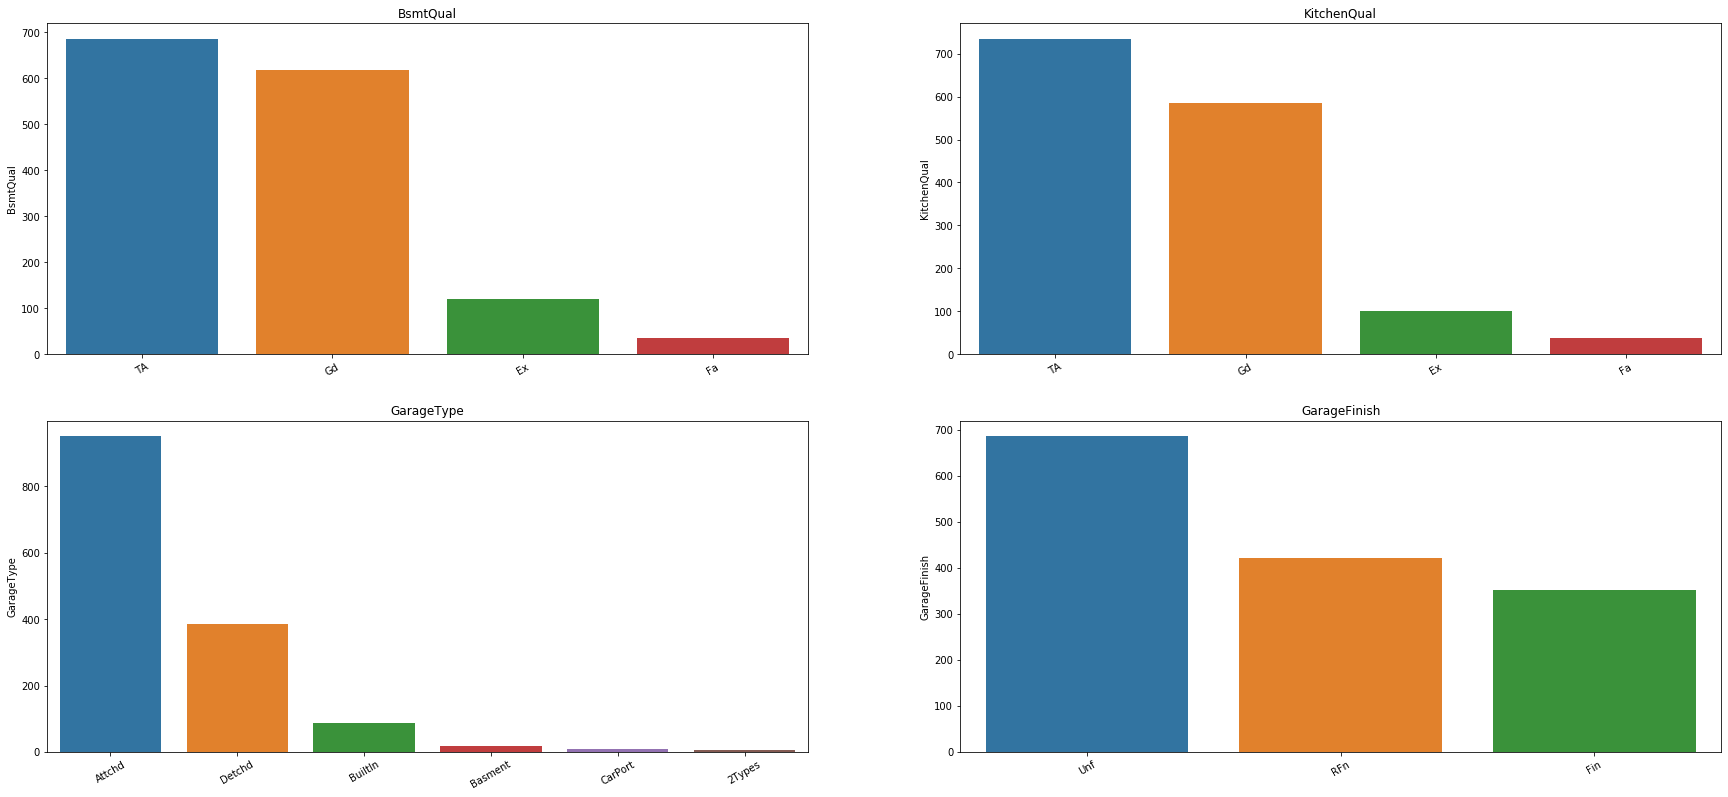

In [37]:
plt.figure(figsize=(30,50)) 
plt.subplot(7,2,7)
sns.barplot(x=housing_data_BsmtQual.index, y=housing_data_BsmtQual)
plt.title("BsmtQual", fontsize=12)
plt.xticks(rotation=30)

plt.subplot(7,2,8)
sns.barplot(x=housing_data_KitchenQual.index, y=housing_data_KitchenQual)
plt.title("KitchenQual", fontsize=12)
plt.xticks(rotation=30)

plt.subplot(7,2,9)
sns.barplot(x=housing_data_GarageType.index, y=housing_data_GarageType)
plt.title("GarageType", fontsize=12)
plt.xticks(rotation=30)

plt.subplot(7,2,10)
sns.barplot(x=housing_data_GarageFinish.index, y=housing_data_GarageFinish)
plt.title("GarageFinish", fontsize=12)
plt.xticks(rotation=30)

plt.show()


### Inferences
1. Most of the houses have basement of good and average quality
2. Most of the houses have kitchen of good and average quality.
3. Majority of the houses have garage as attached followed by detached ones

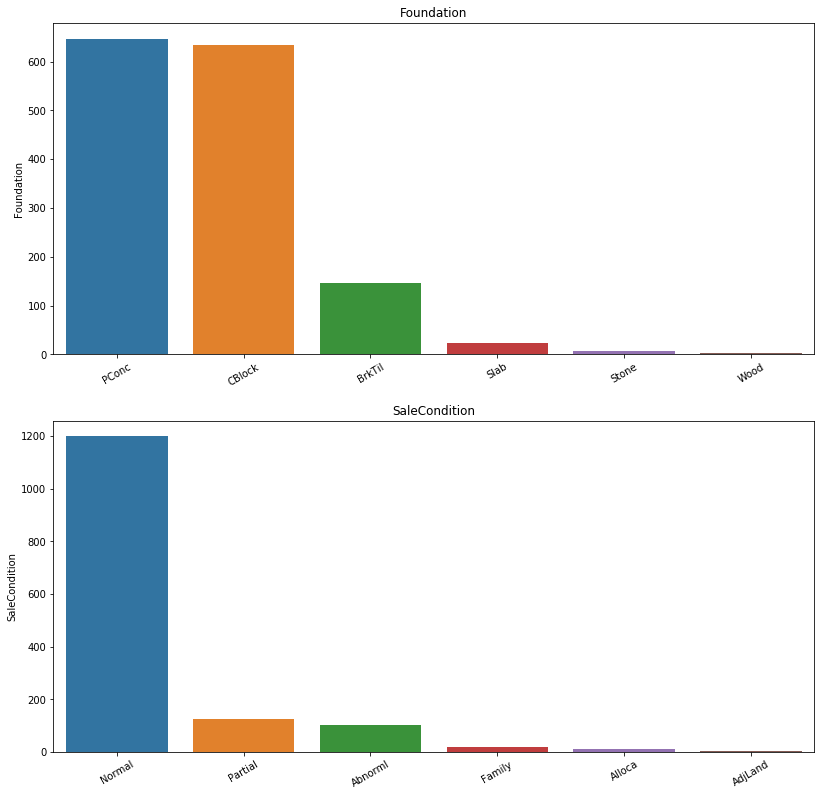

In [38]:
plt.figure(figsize=(30,50)) 
plt.subplot(7,2,11)
sns.barplot(x=housing_data_Foundation.index, y=housing_data_Foundation)
plt.title("Foundation", fontsize=12)
plt.xticks(rotation=30)

plt.subplot(7,2,13)
sns.barplot(x=housing_data_SaleCondition.index, y=housing_data_SaleCondition)
plt.title("SaleCondition", fontsize=12)
plt.xticks(rotation=30)

plt.show()

### Inferences
1. Most of the houses sold have type of sales as normal followed by those houses which were slod in between the construction period
2. Majority of the houses have foundation of material Poured Contrete and almost similar number of houses had foundation as Cinder Block. Very few houses had foundation of Stone or Wood.

#### 2.2 Outlier Analysisof Input data

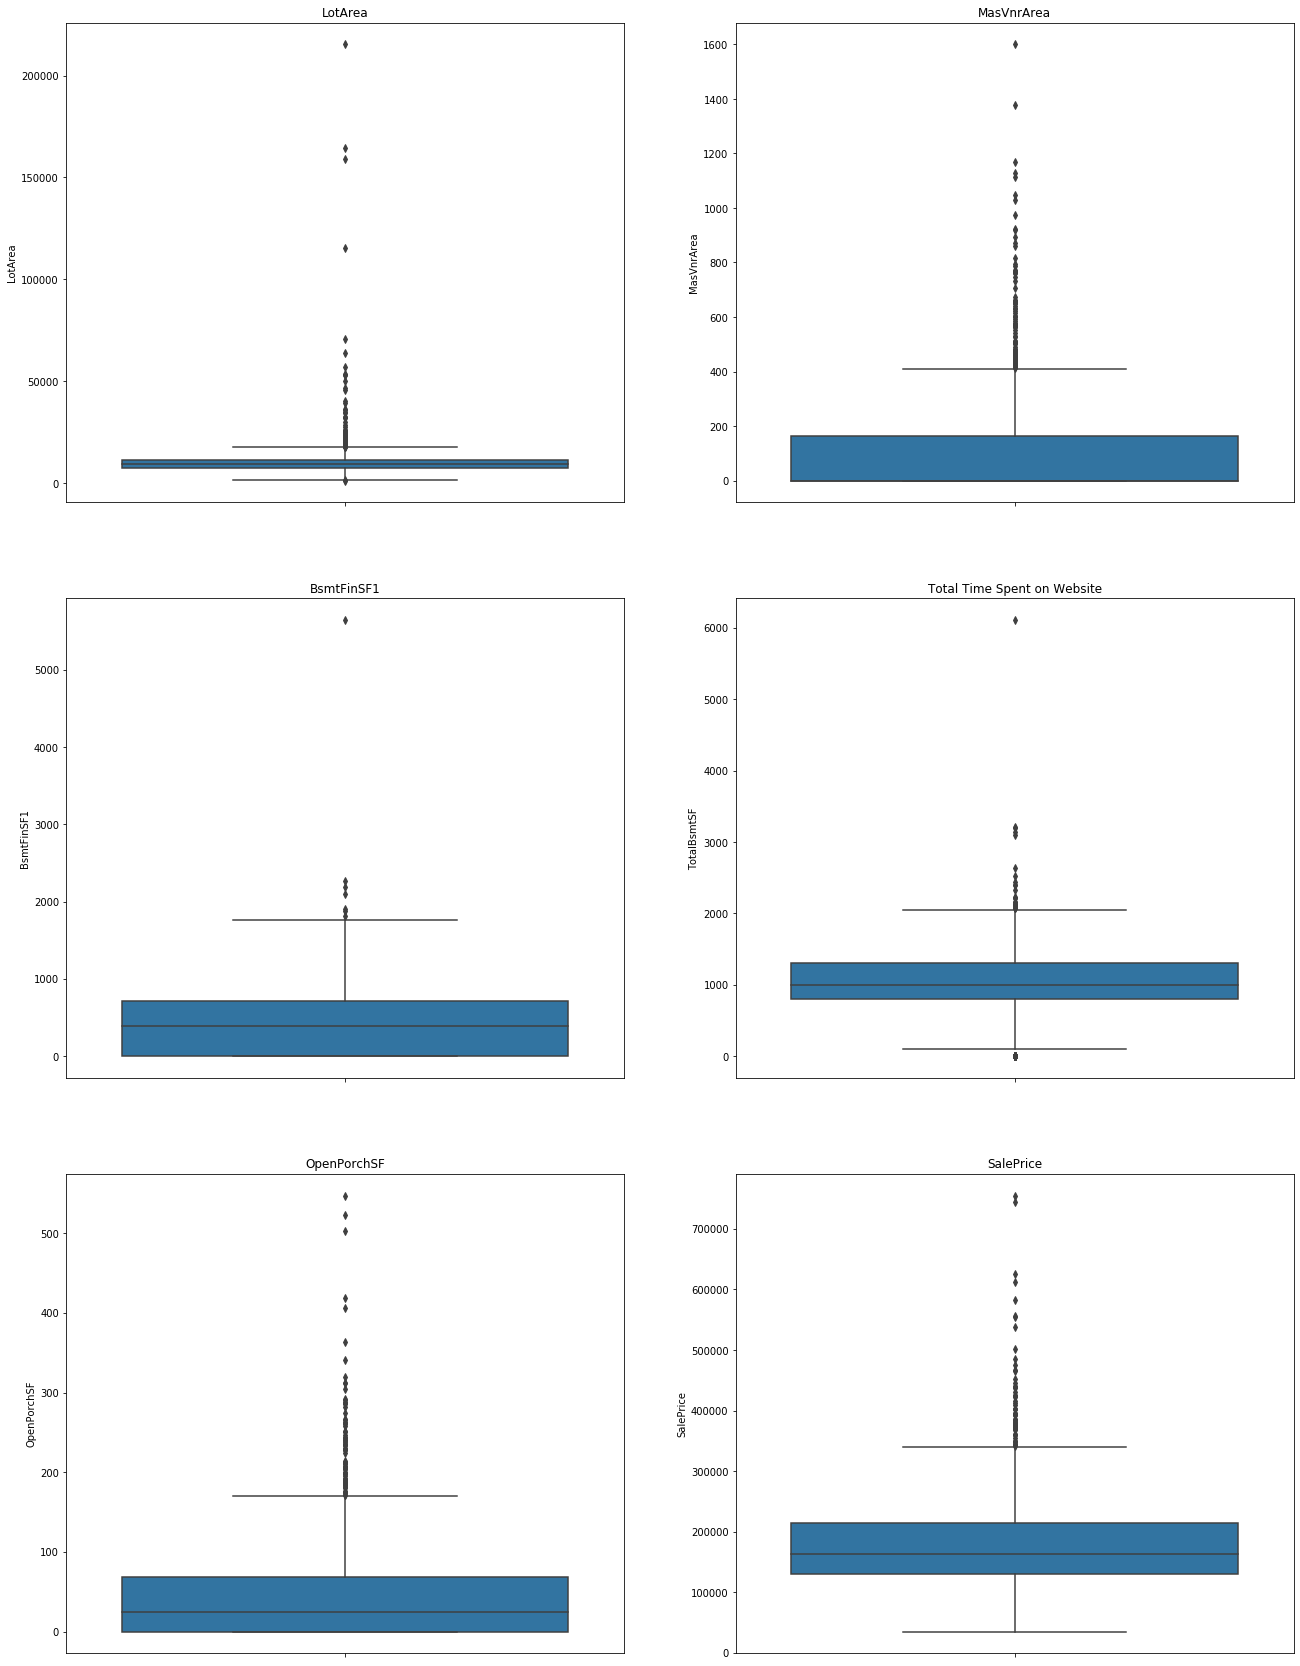

In [39]:
###plot boxplot pf numeric variables to check outliers
plt.figure(figsize = (22,30))

plt.subplot(3,2,1)
sns.boxplot( y=housing_data['LotArea'])
plt.title('LotArea')

plt.subplot(3,2,2)
sns.boxplot( y=housing_data['MasVnrArea'])
plt.title('MasVnrArea')

plt.subplot(3,2,3)
sns.boxplot( y=housing_data['BsmtFinSF1'])
plt.title('BsmtFinSF1')

plt.subplot(3,2,4)
sns.boxplot( y=housing_data['TotalBsmtSF'])
plt.title('Total Time Spent on Website')

plt.subplot(3,2,5)
sns.boxplot( y=housing_data['OpenPorchSF'])
plt.title('OpenPorchSF')


plt.subplot(3,2,6)
sns.boxplot( y=housing_data['SalePrice'])
plt.title('SalePrice')

plt.show()

### Inference
1. Outlier analysis depicts that Lot Area do consist of outliers above 25000 of lot area
2. Few houses sold way had a huge cost and that is also reflected in sale price analysis where median of sale is between 200k to 100k and outliers exist after 350k price

#### 2.3 Correlation Analysis of Input Data

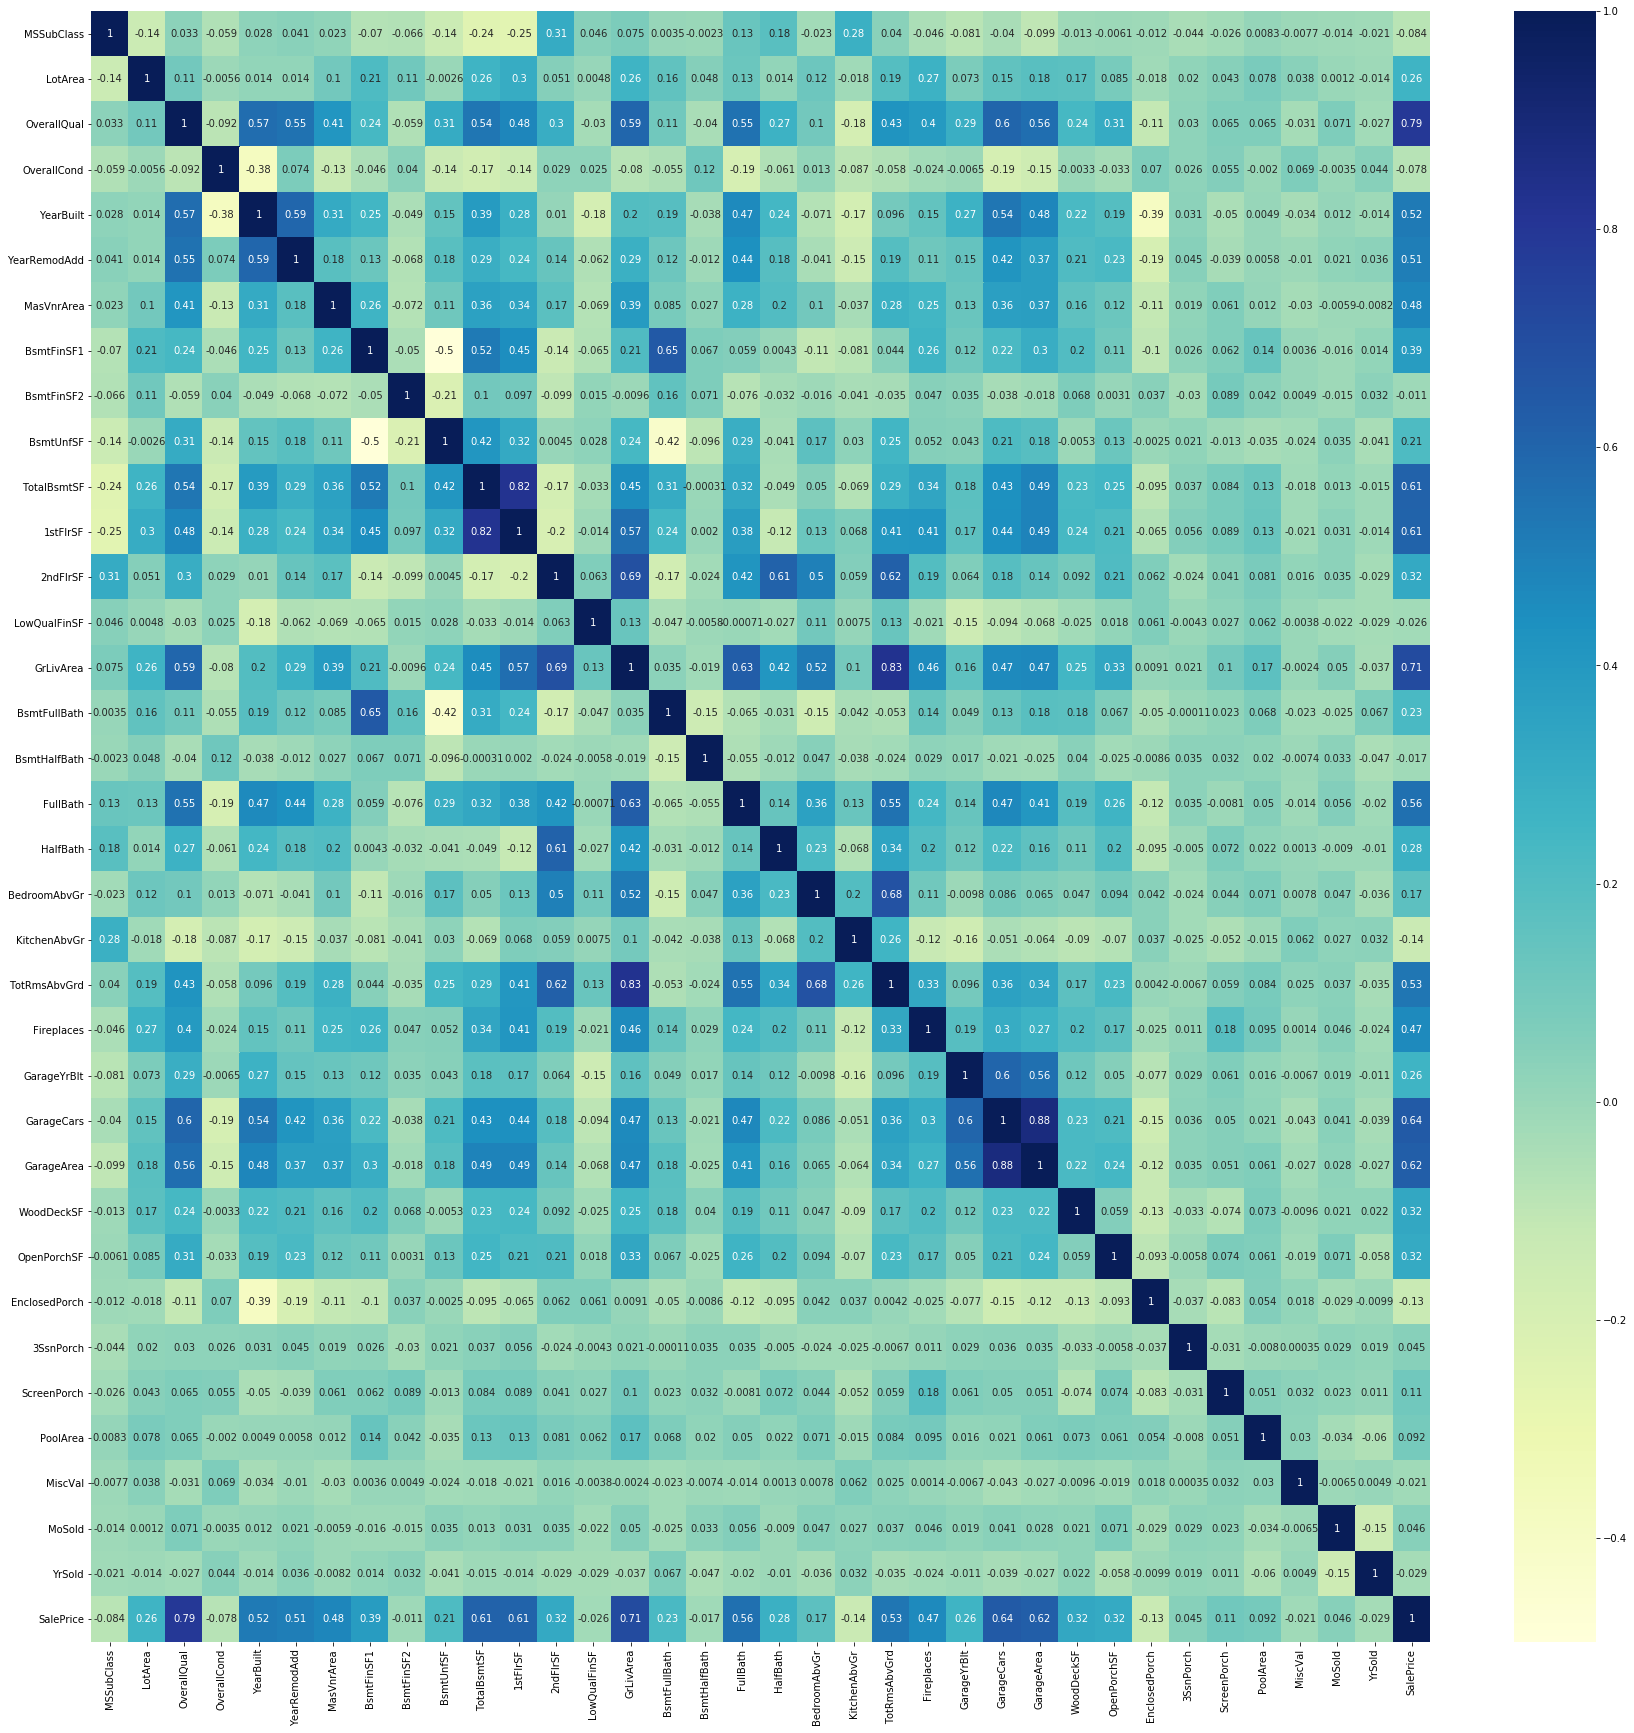

In [40]:
## Plotting heat map to analyze the correlation between attributes
plt.figure(figsize = (30,30))      
sns.heatmap(housing_data.corr(),annot = True, cmap="YlGnBu")
plt.show()

In [41]:
###Top 10 correlations were determined for numerical attributes
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

Housing_data_correlation = (housing_data.corr().abs().where(np.triu(np.ones(housing_data.corr().abs().shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
Housing_data_correlation.head(15)

GarageCars    GarageArea      0.882475
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
OverallQual   SalePrice       0.790982
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFinSF1    BsmtFullBath    0.649212
GarageCars    SalePrice       0.640409
GrLivArea     FullBath        0.630012
GarageArea    SalePrice       0.623431
2ndFlrSF      TotRmsAbvGrd    0.616423
TotalBsmtSF   SalePrice       0.613581
2ndFlrSF      HalfBath        0.609707
1stFlrSF      SalePrice       0.605852
dtype: float64

### Inferences
1. Higghest correlation exsist between garage car and garage area. This also makes sense as if garage area is larger so area 
automatically will be bigger in size to as to accomodate more size.
2. A useful insight also evident from here is that sales price has good correlation with garage car. So more the cars garage is able to store more will the area and more will be the area of property therefore sale price will increase eventually

In [42]:
housing_data.head(2)

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Inside,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Reg,FR2,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


#### 2.4 Bi-VArient Analysis of Attributes

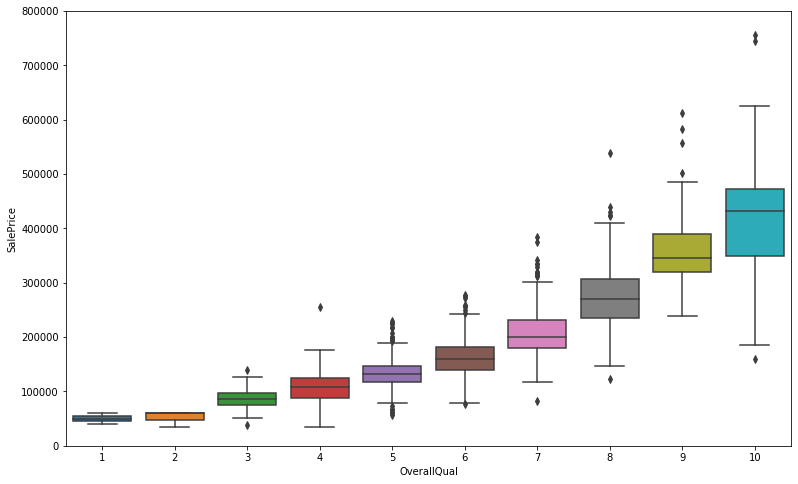

In [43]:
##Plotting box plots for Sales Price and overall qulaity of price
housing = pd.concat([housing_data['SalePrice'], housing_data['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(13, 8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=housing)
fig.axis(ymin=0, ymax=800000);

### Inference 
1. It is evident from the plot that as the overall quality of the house increases the price also goes up. 
2. For house having overall quality as 1 the price for it around 50k whereas for house having quality score as 10 
has sale price lying somewhere between 400k-450k 

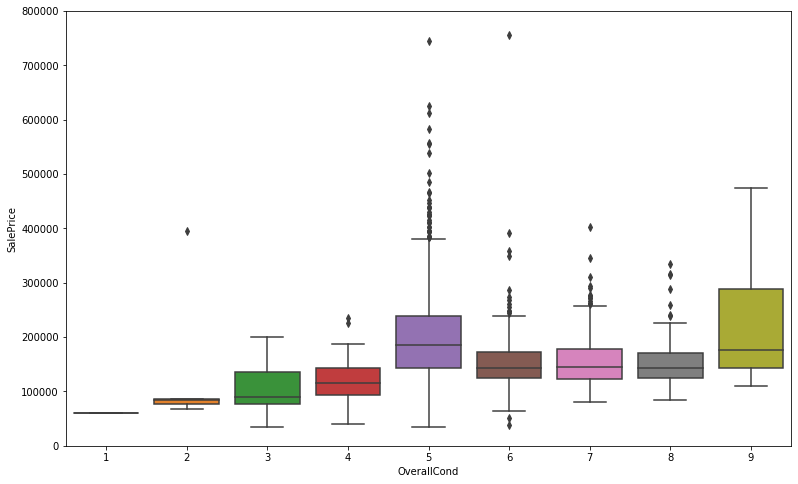

In [44]:
##Plotting box plots for Sales Price and overall qulaity of price
housing = pd.concat([housing_data['SalePrice'], housing_data['OverallCond']], axis=1)
f, ax = plt.subplots(figsize=(13, 8))
fig = sns.boxplot(x='OverallCond', y="SalePrice", data=housing)
fig.axis(ymin=0, ymax=800000);

### Inference
1. It is evident from the plot that as the overall condition of the house increases the price also goes up but the rise is not as strong as over all quality
2. Houses having overall condition as 5 have outliers for price that it was sold for. A reason could be that they were bought as they had a prime location and access to ammenities but their condition was not so premium. But because of the location and size of property the price was way to high

In [45]:
housing_data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Inside,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Reg,FR2,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,IR1,Inside,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,IR1,Corner,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,IR1,FR2,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [46]:
##Listing the numeric columns which needs to be anlyzed and plotted
numeric_columns = ['LotArea', 'OverallCond',
       'MasVnrArea','TotalBsmtSF', 'GrLivArea'
       ,'GarageArea','PoolArea',
       'SalePrice']

<Figure size 2160x2880 with 0 Axes>

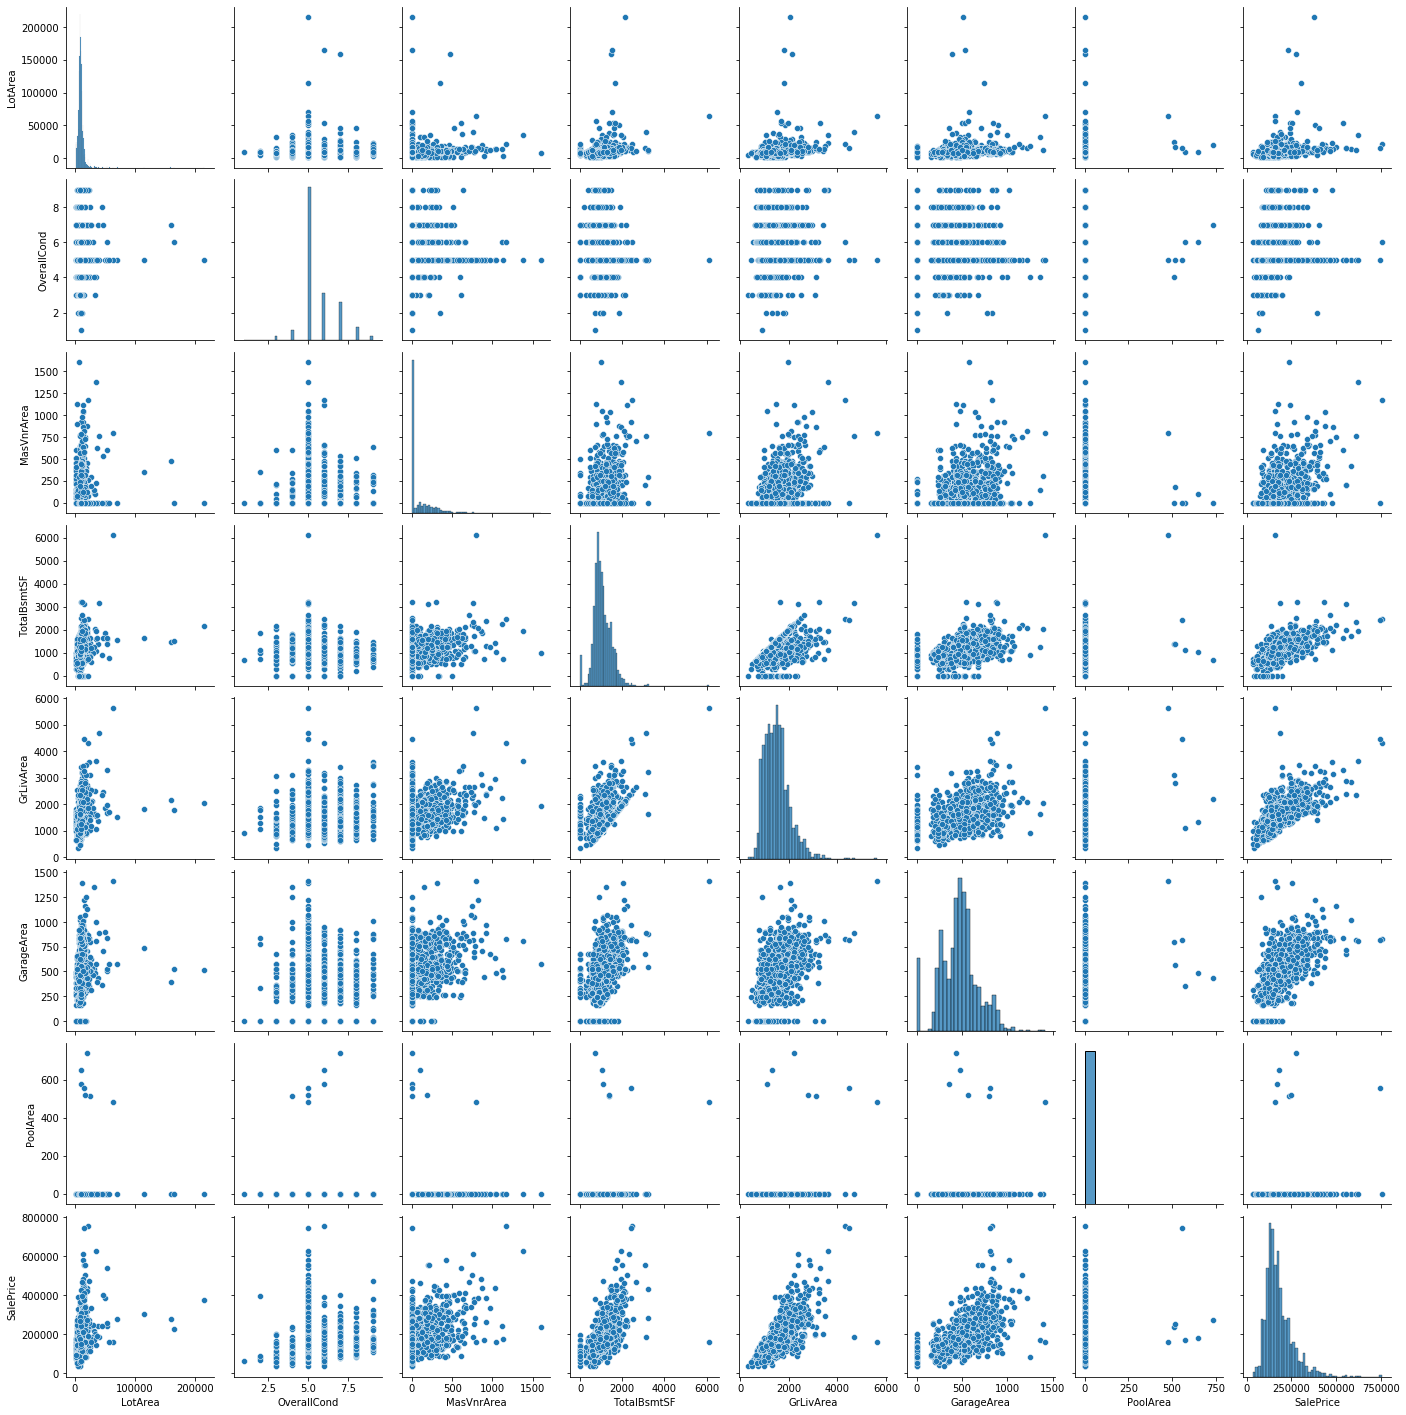

In [47]:
## Plotting the pair plots for numerical attributes
plt.figure(figsize=[30,40])
plot_pair=housing_data[numeric_columns]
sns.pairplot(plot_pair)
plt.show()

### Inferences 
1. Sales prices depicts a linear upwards trend wherin sale price increases as garage area increases
2. Maximum majority of variation is observered for houses having overall condition as 5

In [48]:
housing_data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Reg,Inside,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Reg,FR2,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,IR1,Inside,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,IR1,Corner,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,IR1,FR2,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


## 3. Data Preperation

In [49]:
## Mapping The values in categorical values with appropriate values
housing_data['MSZoning'] = housing_data.MSZoning.map({'RL':0,'RM':1,'FV':2,'RH':3,'C (all)':4})
housing_data['KitchenQual'] = housing_data.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['HeatingQC'] = housing_data.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['BsmtFinType1'] = housing_data.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data['BsmtFinType2'] = housing_data.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data['BsmtQual'] = housing_data.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data['ExterCond'] = housing_data.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['ExterQual'] = housing_data.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data['LotConfig'] = housing_data.LotConfig.map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4})
housing_data['LotShape'] = housing_data.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_data['GarageFinish'] = housing_data.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
housing_data['MasVnrType'] = housing_data.MasVnrType.map({'None':0,'BrkFace':1,'Stone':2,'BrkCmn':3})
housing_data['Exterior1st'] = housing_data.Exterior1st.map({'VinylSd':0,'HdBoard':1,'MetalSd':2,'Wd Sdng':3,'Plywood':4,'CemntBd':5,'BrkFace':6,'WdShing':7,'Stucco':8,
                                                            'AsbShng':9,'Stone':10,'BrkComm':11,'CBlock':12,'ImStucc':13,'AsphShn':14,'CmentBd':5,'Wd Shng':15,'Brk Cmn':11,'Other':16}) 
housing_data['Exterior2nd'] = housing_data.Exterior2nd.map({'VinylSd':0,'HdBoard':1,'MetalSd':2,'Wd Sdng':3,'Plywood':4,'CemntBd':5,'BrkFace':6,'WdShing':7,'Stucco':8,
                                                            'AsbShng':9,'Stone':10,'BrkComm':11,'CBlock':12,'ImStucc':13,'AsphShn':14,'CmentBd':5,'Wd Shng':15,'Brk Cmn':11,'Other':16})							  
housing_data['SaleCondition'] = housing_data.SaleCondition.map({'Normal':0,'Partial':1,'Abnorml':2,'Family':3,'Alloca':4,'AdjLand':5})
housing_data['SaleType'] = housing_data.SaleType.map({'WD':0,'New':1,'COD':2,'ConLD':3,'ConLI':4,'ConLw':5,'CWD':6,'Oth':7,'Con':8})
housing_data['GarageType'] = housing_data.GarageType.map({'Attchd':0,'Detchd':1,'BuiltIn':2,'Basment':3,'CarPort':4,'2Types':5})
housing_data['Foundation'] = housing_data.Foundation.map({'PConc':0,'CBlock':1,'BrkTil':2,'Slab':3,'Stone':4,'Wood':5})
housing_data['RoofStyle'] = housing_data.RoofStyle.map({'Gable':0,'Hip':1,'Flat':2,'Gambrel':3,'Mansard':4,'Shed':5})
housing_data['BldgType'] = housing_data.BldgType.map({'1Fam':0,'TwnhsE':1,'Duplex':2,'Twnhs':3,'2fmCon':4})
housing_data['Condition1'] = housing_data.Condition1.map({'Norm':0,'Feedr':1,'Artery':2,'RRAn':3,'PosN':4,'RRAe':5,'PosA':6,'RRNn':7,'RRNe':8})
housing_data['HouseStyle'] = housing_data.HouseStyle.map({'1Story':0,'2Story':1,'1.5Fin':2,'SLvl':3,'SFoyer':4,'1.5Unf':5,'2.5Unf':6,'2.5Fin':7})
housing_data['BsmtExposure'] = housing_data.BsmtExposure.map({'No':0,'Av':1,'Gd':2,'Mn':3})

In [50]:
housing_data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,8450,3,0,0,0,1,7,5,2003,2003,0,0,0,1,196.0,3,2,0,4,0,6,706,1,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,2003.0,2,2,548,0,61,0,0,0,0,0,2,2008,0,0,208500
1,20,0,9600,3,3,1,0,0,6,8,1976,1976,0,2,2,0,0.0,2,2,1,4,2,5,978,1,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,1,0,1976.0,2,2,460,298,0,0,0,0,0,0,5,2007,0,0,181500
2,60,0,11250,0,0,0,0,1,7,5,2001,2002,0,0,0,1,162.0,3,2,0,4,3,6,486,1,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,6,1,0,2001.0,2,2,608,0,42,0,0,0,0,0,9,2008,0,0,223500
3,70,0,9550,0,1,0,0,1,7,5,1915,1970,0,3,15,0,0.0,2,2,2,3,0,5,216,1,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,3,7,1,1,1998.0,1,3,642,0,35,272,0,0,0,0,2,2006,0,2,140000
4,60,0,14260,0,3,0,0,1,8,5,2000,2000,0,0,0,1,350.0,3,2,0,4,1,6,655,1,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,0,2000.0,2,3,836,192,84,0,0,0,0,0,12,2008,0,0,250000


In [51]:
#Check the shape of housing data
housing_data.shape

(1460, 59)

In [52]:
housing_data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,8450,3,0,0,0,1,7,5,2003,2003,0,0,0,1,196.0,3,2,0,4,0,6,706,1,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,2003.0,2,2,548,0,61,0,0,0,0,0,2,2008,0,0,208500
1,20,0,9600,3,3,1,0,0,6,8,1976,1976,0,2,2,0,0.0,2,2,1,4,2,5,978,1,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,1,0,1976.0,2,2,460,298,0,0,0,0,0,0,5,2007,0,0,181500
2,60,0,11250,0,0,0,0,1,7,5,2001,2002,0,0,0,1,162.0,3,2,0,4,3,6,486,1,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,6,1,0,2001.0,2,2,608,0,42,0,0,0,0,0,9,2008,0,0,223500
3,70,0,9550,0,1,0,0,1,7,5,1915,1970,0,3,15,0,0.0,2,2,2,3,0,5,216,1,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,3,7,1,1,1998.0,1,3,642,0,35,272,0,0,0,0,2,2006,0,2,140000
4,60,0,14260,0,3,0,0,1,8,5,2000,2000,0,0,0,1,350.0,3,2,0,4,1,6,655,1,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,0,2000.0,2,3,836,192,84,0,0,0,0,0,12,2008,0,0,250000


In [53]:
## Converting Year into a more logical value e.g. instead of year let's conver to number of year 
housing_data['YearBuilt'] = 2021 - housing_data['YearBuilt']
housing_data['YearRemodAdd'] = 2021 - housing_data['YearRemodAdd']
housing_data['GarageYrBlt'] = 2021 - housing_data['GarageYrBlt']
housing_data['YrSold'] = 2021 - housing_data['YrSold']
#Dropping Garage built year as yaer built can server the purpose for estimating age of house 
housing_data.drop(['GarageYrBlt'], axis=1, inplace=True)

In [54]:
housing_data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,8450,3,0,0,0,1,7,5,18,18,0,0,0,1,196.0,3,2,0,4,0,6,706,1,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,2,2,548,0,61,0,0,0,0,0,2,13,0,0,208500
1,20,0,9600,3,3,1,0,0,6,8,45,45,0,2,2,0,0.0,2,2,1,4,2,5,978,1,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,1,0,2,2,460,298,0,0,0,0,0,0,5,14,0,0,181500
2,60,0,11250,0,0,0,0,1,7,5,20,19,0,0,0,1,162.0,3,2,0,4,3,6,486,1,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,6,1,0,2,2,608,0,42,0,0,0,0,0,9,13,0,0,223500
3,70,0,9550,0,1,0,0,1,7,5,106,51,0,3,15,0,0.0,2,2,2,3,0,5,216,1,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,3,7,1,1,1,3,642,0,35,272,0,0,0,0,2,15,0,2,140000
4,60,0,14260,0,3,0,0,1,8,5,21,21,0,0,0,1,350.0,3,2,0,4,1,6,655,1,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,0,2,3,836,192,84,0,0,0,0,0,12,13,0,0,250000


In [55]:
## Transforming Sales price in logrithmic domain so that values are distributed normally
housing_data['SalePrice'] = np.log1p(housing_data['SalePrice'])

In [56]:
housing_data.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,8450,3,0,0,0,1,7,5,18,18,0,0,0,1,196.0,3,2,0,4,0,6,706,1,0,150,856,4,856,854,0,1710,1,0,2,1,3,1,3,8,0,0,2,2,548,0,61,0,0,0,0,0,2,13,0,0,12.247699
1,20,0,9600,3,3,1,0,0,6,8,45,45,0,2,2,0,0.0,2,2,1,4,2,5,978,1,0,284,1262,4,1262,0,0,1262,0,1,2,0,3,1,2,6,1,0,2,2,460,298,0,0,0,0,0,0,5,14,0,0,12.109016
2,60,0,11250,0,0,0,0,1,7,5,20,19,0,0,0,1,162.0,3,2,0,4,3,6,486,1,0,434,920,4,920,866,0,1786,1,0,2,1,3,1,3,6,1,0,2,2,608,0,42,0,0,0,0,0,9,13,0,0,12.317171
3,70,0,9550,0,1,0,0,1,7,5,106,51,0,3,15,0,0.0,2,2,2,3,0,5,216,1,0,540,756,3,961,756,0,1717,1,0,1,0,3,1,3,7,1,1,1,3,642,0,35,272,0,0,0,0,2,15,0,2,11.849405
4,60,0,14260,0,3,0,0,1,8,5,21,21,0,0,0,1,350.0,3,2,0,4,1,6,655,1,0,490,1145,4,1145,1053,0,2198,1,0,2,1,4,1,3,9,1,0,2,3,836,192,84,0,0,0,0,0,12,13,0,0,12.429220


## 4. Model Building

In [57]:
##Sepearting the data in X & Y where X is input terms and y is output i.e. sale price
X = housing_data.drop(['SalePrice'], axis=1)
y = housing_data["SalePrice"]

In [58]:
# split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
                                                    test_size = 0.3,random_state=100)

In [59]:
X_train.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
210,30,0,5604,3,0,0,0,0,5,6,96,71,0,8,8,0,0.0,2,2,1,3,0,3,468,1,0,396,864,2,864,0,0,864,1,0,1,0,2,1,2,5,0,0,1,0,0,0,0,96,0,0,0,0,4,13,0,0
318,60,0,9900,3,0,0,0,1,7,5,28,28,0,1,1,1,256.0,3,2,0,4,2,6,987,1,0,360,1347,4,1372,1274,0,2646,1,0,2,1,4,1,3,9,1,0,2,3,656,340,60,144,0,0,0,0,4,12,0,0
239,50,0,8741,3,0,0,0,2,6,4,76,71,0,0,0,0,0.0,2,2,1,3,0,2,94,1,0,641,735,2,798,689,0,1487,0,0,1,1,3,1,2,7,1,1,1,1,220,0,140,0,0,0,0,0,4,11,0,0
986,50,1,5310,3,1,1,0,2,6,8,111,18,1,0,0,0,0.0,2,3,1,3,0,1,0,1,0,485,485,3,1001,634,0,1635,0,0,1,0,2,1,3,5,0,0,1,1,255,394,0,0,0,0,0,0,6,15,0,0
1416,190,1,11340,3,0,0,4,1,4,6,136,71,0,0,9,0,0.0,2,2,0,3,0,1,0,1,0,777,777,3,1246,1044,0,2290,0,0,2,0,4,2,2,11,0,1,1,2,560,0,0,114,0,0,0,0,4,11,0,0


In [60]:
## Scaling the training data so that no varibale overpowers the outcome significantly as scale of varaible are different
##Scaling also helps to improve the interprtability of target variable which in our case is sale price 
scaler = StandardScaler()

col=['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','LowQualFinSF',
        'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']

X_train[col] = scaler.fit_transform(X_train[col])

X_train.head()

C:\Users\Vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Vishal\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
210,30,0,-0.473765,3,0,0,0,0,5,6,96,71,0,8,8,0,-0.560537,2,2,1,3,0,3,0.043512,1,-0.293313,-0.374367,-0.430911,2,-0.765065,-0.787597,-0.124502,-1.228053,1,0,1,0,2,1,2,5,0,0,1,0,-2.217786,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,0,4,13,0,0
318,60,0,-0.056845,3,0,0,0,1,7,5,28,28,0,1,1,1,0.807462,3,2,0,4,2,6,1.160345,1,-0.293313,-0.454644,0.621579,4,0.511914,2.140556,-0.124502,2.123103,1,0,2,1,4,1,3,9,1,0,2,3,0.867506,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,0,4,12,0,0
239,50,0,-0.169324,3,0,0,0,2,6,4,76,71,0,0,0,0,-0.560537,2,2,1,3,0,2,-0.761296,1,-0.293313,0.171964,-0.712011,2,-0.930972,0.795996,-0.124502,-0.056465,0,0,1,1,3,1,2,7,1,1,1,1,-1.183084,-0.743160,1.407748,-0.369395,-0.121922,-0.275126,-0.062302,0,4,11,0,0
986,50,1,-0.502297,3,1,1,0,2,6,8,111,18,1,0,0,0,-0.560537,2,3,1,3,0,1,-0.963574,1,-0.293313,-0.175904,-1.256778,3,-0.420683,0.669584,-0.124502,0.221858,0,0,1,0,2,1,3,5,0,0,1,1,-1.018473,2.423490,-0.709347,-0.369395,-0.121922,-0.275126,-0.062302,0,6,15,0,0
1416,190,1,0.082905,3,0,0,4,1,4,6,136,71,0,0,9,0,-0.560537,2,2,0,3,0,1,-0.963574,1,-0.293313,0.475233,-0.620490,3,0.195183,1.611926,-0.124502,1.453624,0,0,2,0,4,2,2,11,0,1,1,2,0.416000,-0.743160,-0.709347,1.435160,-0.121922,-0.275126,-0.062302,0,4,11,0,0


In [61]:
## Scaling the test part as well
X_test[col] = scaler.transform(X_test[col])

C:\Users\Vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Vishal\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [62]:
X_test.shape

(438, 57)

In [63]:
##Verify the columns in training set
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [64]:
X_train.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
210,30,0,-0.473765,3,0,0,0,0,5,6,96,71,0,8,8,0,-0.560537,2,2,1,3,0,3,0.043512,1,-0.293313,-0.374367,-0.430911,2,-0.765065,-0.787597,-0.124502,-1.228053,1,0,1,0,2,1,2,5,0,0,1,0,-2.217786,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,0,4,13,0,0
318,60,0,-0.056845,3,0,0,0,1,7,5,28,28,0,1,1,1,0.807462,3,2,0,4,2,6,1.160345,1,-0.293313,-0.454644,0.621579,4,0.511914,2.140556,-0.124502,2.123103,1,0,2,1,4,1,3,9,1,0,2,3,0.867506,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,0,4,12,0,0
239,50,0,-0.169324,3,0,0,0,2,6,4,76,71,0,0,0,0,-0.560537,2,2,1,3,0,2,-0.761296,1,-0.293313,0.171964,-0.712011,2,-0.930972,0.795996,-0.124502,-0.056465,0,0,1,1,3,1,2,7,1,1,1,1,-1.183084,-0.743160,1.407748,-0.369395,-0.121922,-0.275126,-0.062302,0,4,11,0,0
986,50,1,-0.502297,3,1,1,0,2,6,8,111,18,1,0,0,0,-0.560537,2,3,1,3,0,1,-0.963574,1,-0.293313,-0.175904,-1.256778,3,-0.420683,0.669584,-0.124502,0.221858,0,0,1,0,2,1,3,5,0,0,1,1,-1.018473,2.423490,-0.709347,-0.369395,-0.121922,-0.275126,-0.062302,0,6,15,0,0
1416,190,1,0.082905,3,0,0,4,1,4,6,136,71,0,0,9,0,-0.560537,2,2,0,3,0,1,-0.963574,1,-0.293313,0.475233,-0.620490,3,0.195183,1.611926,-0.124502,1.453624,0,0,2,0,4,2,2,11,0,1,1,2,0.416000,-0.743160,-0.709347,1.435160,-0.121922,-0.275126,-0.062302,0,4,11,0,0


### Regression using lasso

In [65]:
# Applying Grid Search CV for Lasso
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20]}

# cross validation
folds = 5
lasso_grid_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_grid_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Vishal\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01650957562771005, tolerance: 0.012734338455926726
  positive)


Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [66]:
cv_results = pd.DataFrame(lasso_grid_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031416,0.001294,0.001005,0.000011,0.0001,{'alpha': 0.0001},-0.102862,-0.107068,-0.101701,-0.088327,-0.100591,-0.100110,0.006286,2,-0.095132,-0.083665,-0.090455,-0.096909,-0.094986,-0.092229,0.004784
1,0.007984,0.000660,0.001249,0.000384,0.001,{'alpha': 0.001},-0.100857,-0.106263,-0.100727,-0.088013,-0.099691,-0.099110,0.006005,1,-0.094512,-0.083811,-0.090640,-0.096415,-0.095188,-0.092113,0.004579
2,0.003345,0.000450,0.000984,0.000016,0.01,{'alpha': 0.01},-0.100346,-0.106717,-0.104667,-0.091349,-0.102929,-0.101201,0.005352,3,-0.099576,-0.089084,-0.095968,-0.101337,-0.100795,-0.097352,0.004538
3,0.003052,0.000147,0.000974,0.000093,0.1,{'alpha': 0.1},-0.146898,-0.161271,-0.158632,-0.149240,-0.163636,-0.155935,0.006657,4,-0.154398,-0.153246,-0.151723,-0.155101,-0.157575,-0.154409,0.001953
4,0.003033,0.000591,0.001015,0.000022,0.2,{'alpha': 0.2},-0.192372,-0.207295,-0.207434,-0.199235,-0.216648,-0.204597,0.008231,5,-0.202103,-0.201940,-0.203304,-0.203232,-0.203762,-0.202868,0.000717


In [67]:
#checking the value of optimum number of parameters
print(lasso_grid_cv.best_params_)
print(lasso_grid_cv.best_score_)

{'alpha': 0.001}
-0.09911029630768578


In [68]:
## Using lambda to be 0.001 from above results
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train,y_train)

y_train_pred = lasso_model.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lasso_model.predict(X_test)
##Calculating the R2 Score
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.882654775362897
0.8690361661916758


In [69]:
model_parameter = list(lasso_model.coef_)
model_parameter.insert(0,lasso_model.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lm_coefficients = pd.DataFrame(list(zip(cols,model_parameter)))
lm_coefficients.columns = ['Feaure','Coef']

lm_coefficients.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,10.846112
33,BsmtFullBath,0.093247
9,OverallCond,0.073983
45,GarageArea,0.052645
34,BsmtHalfBath,0.047421
42,GarageType,0.043093
10,YearBuilt,0.040582
21,BsmtExposure,0.031102
40,TotRmsAbvGrd,0.029739
36,HalfBath,0.024713


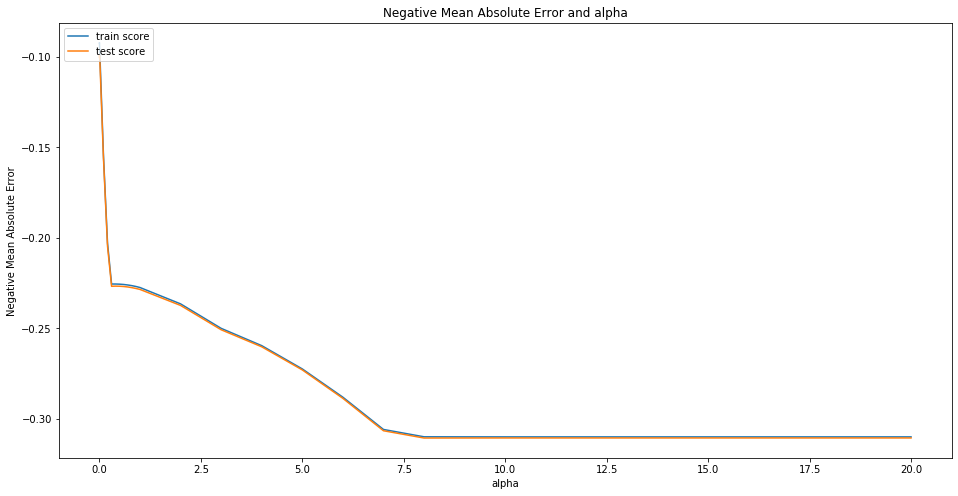

In [70]:
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.ylabel('Negative Mean Absolute Error')
plt.xlabel('alpha')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Regression using Ridge

In [71]:
# list pf alphas

folds = 5
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

## Creating Ridge module
ridge = Ridge()


ridge_model_grid_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 

ridge_model_grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [72]:
print(ridge_model_grid_cv.best_params_)
print(ridge_model_grid_cv.best_score_)

{'alpha': 100}
-0.09743942895304628


In [73]:
ridge_cv_results = pd.DataFrame(ridge_model_grid_cv.cv_results_)
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003829,0.000710,0.000940,0.000082,0.0001,{'alpha': 0.0001},-0.103056,-0.107156,-0.102037,-0.088350,-0.100732,-0.100266,0.006334,25,-0.095197,-0.083695,-0.090532,-0.096983,-0.095000,-0.092282,0.004792
1,0.003088,0.000250,0.000699,0.000361,0.001,{'alpha': 0.001},-0.103056,-0.107156,-0.102036,-0.088350,-0.100732,-0.100266,0.006334,24,-0.095197,-0.083695,-0.090532,-0.096983,-0.095000,-0.092282,0.004792
2,0.002397,0.000477,0.000796,0.000398,0.01,{'alpha': 0.01},-0.103055,-0.107156,-0.102035,-0.088349,-0.100732,-0.100265,0.006334,23,-0.095197,-0.083694,-0.090531,-0.096983,-0.095000,-0.092281,0.004792
3,0.002612,0.000477,0.001191,0.000365,0.1,{'alpha': 0.1},-0.103046,-0.107155,-0.102019,-0.088341,-0.100728,-0.100258,0.006335,22,-0.095194,-0.083693,-0.090525,-0.096979,-0.094997,-0.092278,0.004791
4,0.002791,0.000382,0.001124,0.000270,0.2,{'alpha': 0.2},-0.103036,-0.107154,-0.102001,-0.088331,-0.100724,-0.100249,0.006337,21,-0.095191,-0.083692,-0.090519,-0.096975,-0.094994,-0.092274,0.004790


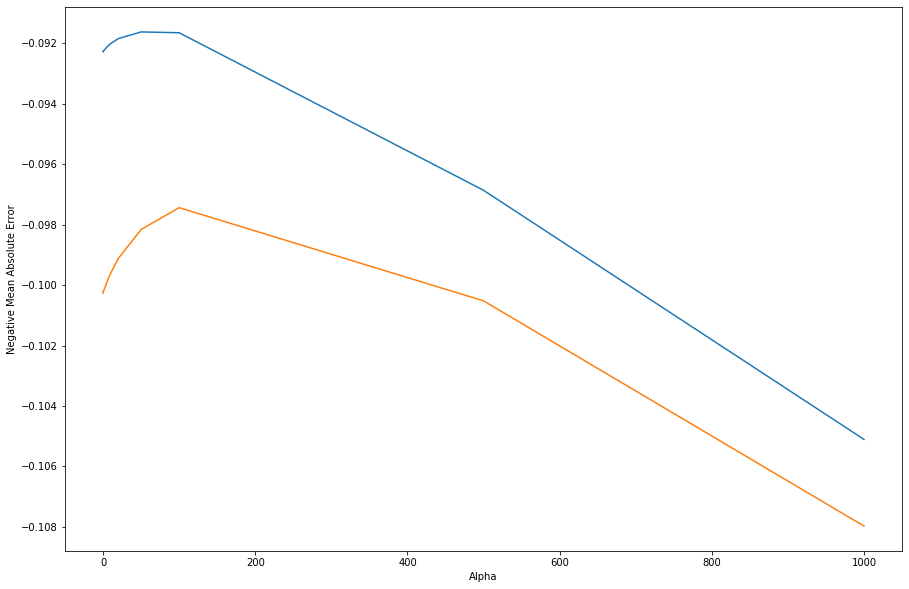

In [74]:
plt.figure(figsize=(15,10))
plt.plot(ridge_cv_results['param_alpha'].astype('int32'),ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'].astype('int32'),ridge_cv_results['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.show()

In [75]:
##Based on best fit we take lambda to be 1
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.15510696e-04, -2.12901502e-02,  1.92237732e-02, -3.48520018e-03,
        1.00902295e-03, -1.59435611e-02, -7.88504060e-03, -1.56231916e-03,
        6.87182360e-02,  3.67608171e-02, -1.63548258e-03, -1.02895394e-03,
        1.29516709e-02, -1.03722351e-03, -1.71345079e-03, -3.51718280e-03,
        4.40027302e-03,  1.07441313e-02, -2.35645280e-03, -1.13132820e-02,
        2.59147269e-02,  1.21066161e-02,  1.50917984e-02,  2.19089780e-03,
       -5.70849820e-03,  8.85078404e-03,  4.53191538e-03,  9.94055838e-03,
        1.23269879e-02,  3.40541233e-02,  2.59154489e-02,  3.96522527e-03,
        4.70397971e-02,  3.17580562e-02,  2.70974283e-03,  2.26699263e-02,
        1.71849524e-02,  1.15411179e-02, -5.75674987e-03,  2.57688332e-02,
        1.66101828e-02,  3.91678881e-02, -1.55169001e-02,  1.56488457e-02,
        3.68002572e-02,  2.52730368e-02,  1.21630784e-02, -2.00690840e-03,
        8.44938952e-03,  8.85646044e-03,  1.24896481e-02, -2.06302182e-02,
       -7.79679182e-06, -

In [76]:
##Calculate the R2 Score on train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8812310949663247


In [77]:
##Calculate the R2 Score on test data
y_test_pred  = ridge.predict(X_test)
##Calculating the R2 Score
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8696002707222521


In [78]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

ridge_coef.sort_values(by='Coef',ascending=False).head(10)


,Feaure,Coef
0,MSSubClass,10.902121
9,OverallCond,0.068718
33,BsmtFullBath,0.047040
42,GarageType,0.039168
45,GarageArea,0.036800
10,YearBuilt,0.036761
30,2ndFlrSF,0.034054
34,BsmtHalfBath,0.031758
31,LowQualFinSF,0.025915
21,BsmtExposure,0.025915


In [79]:
## Calculate the Mean Square Error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.021455699900370325


## 5. Conclusion 

The Data containing the attributes that are evaluated and considered while purchasing a House was analyzed. The Target Column or Output was Sale Price i.e. price at which the house is sold was to be predicted on test/unseen data.

To achieve this the data was analyzed & processed to eliminate any data nuances. Once the data is standardised and cleaned the data was then used for model building purpose.

To predict the sale price for test/unseen data Lasso and Ridge regression were used and it was found that both model perfomed well and as per expectation.

The R2 Score for Lasso on unseen data was 0.86 and for ridge was ~0.87 and Root mean square error came out to be 0.02

Few Attributes which had a significant impact on sale price are as follows -

1. MSSubClass	
2. OverallCond
3. BsmtFullBath
4. GarageType
5. GarageArea
6. YearBuilt
7. 2ndFlrSF
8. BsmtHalfBath
9. LowQualFinSF
20. BsmtExposure

Overall the model did perfomed decently well which is evident by the outcome as well.